# Solution to Kaggle Problem 'House Prices: Advanced Regression Techniques'

***

**Name：AI-23**

**Submission Date：11-01-2018**

***

# Abstract

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. In this dataset the problem is to predict the price of a house based on the 79 given features. 

The main purpose of solving this problem are:
Doing creative featutre engineering
* Doing creative feature engineering
* Using Taditional model using Sckit Learn and Deep model using Keras

# Neural Network Approach

Since Neural network can predict both linear and non linear function between the feauture variables and the target variable , it is used to predict the house price in this problem. In the  [first approach](#f) the most simplest approach is followed. All the missing data of numeric collumns were replaced by their mean and missing values of the categorical variable of their maximum occurred values. In the [second approach](#s) another approach of feauture engineeing and realm of Hyper parameter optimization is explored. 

<a id="f"></a>
### First Approach

Importing all the necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

Reading the training (learining) and test data. 

In [7]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Preprocessing

Drawing correlation matrinx and taking the best 40 feature on the basis of correlation with the target variable 'SalePrice'.

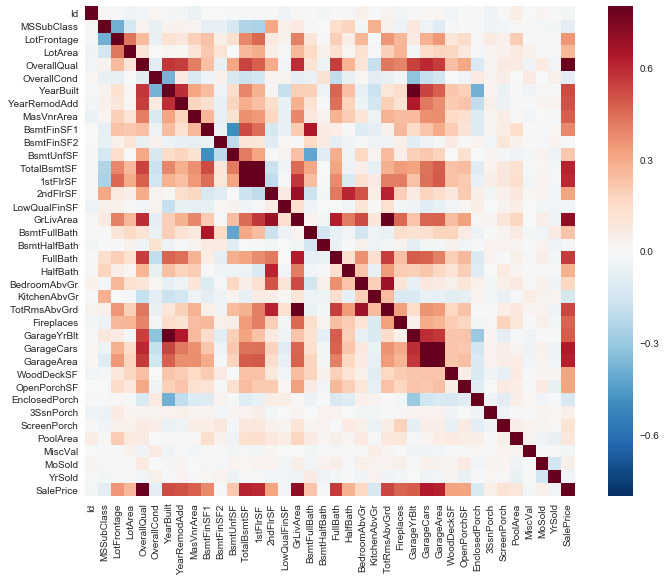

In [8]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#saleprice correlation matrix
k = 40 #number of variables for to be put into this model
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
train_df=train_df[list(cols)]
test_df=test_df[cols.drop('SalePrice')]

Handliing missing values of the training data and doing decimal encoding on the object type variables with the help of LabelEncoder package.

In [9]:
#Handling Missing values
train_df = train_df.fillna(train_df.mean())

categoric_feats = train_df.dtypes[train_df.dtypes == "object"].index.tolist()

for item in list(categoric_feats):
    train_df[item]=train_df[item].fillna(train_df[item].dropna().max())
    train_df[item] = LabelEncoder().fit_transform(train_df[item])
    
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data #Checking if there exist any more missing values in the training data

,Total,Percent
KitchenAbvGr,0,0.0
YearBuilt,0,0.0
WoodDeckSF,0,0.0
LotFrontage,0,0.0
BsmtFinSF1,0,0.0
Fireplaces,0,0.0
MasVnrArea,0,0.0
GarageYrBlt,0,0.0
YearRemodAdd,0,0.0
TotRmsAbvGrd,0,0.0


Doing same treatment on test data

In [10]:
#Handling Missing values
test_df = test_df.fillna(test_df.mean())

for item in categoric_feats:
    test_df[item]=test_df[item].fillna(test_df[item].dropna().max())
    test_df[item] = LabelEncoder().fit_transform(test_df[item])
    

total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
KitchenAbvGr,0,0.0
OpenPorchSF,0,0.0
WoodDeckSF,0,0.0
LotFrontage,0,0.0
BsmtFinSF1,0,0.0
Fireplaces,0,0.0
MasVnrArea,0,0.0
GarageYrBlt,0,0.0
YearRemodAdd,0,0.0
YearBuilt,0,0.0


Doing normalization of different variables

In [12]:
X_train=train_df.drop('SalePrice',axis=1).values
y_train=train_df['SalePrice'].values

X_test=test_df.values

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

Training the neural network model with some manually set parameters. (No hyper parameter optimization is not done here. Hyperparameter optimization is done in the [second approach](#s) on the neural network model)

In [13]:
clf = MLPRegressor(max_iter = 500, solver='lbfgs', hidden_layer_sizes = (50,50,50), activation='relu')
clf.fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)
pred_df = pd.DataFrame(y_pred, index=test_df["Id"], columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')

#### Kaggle Score

Screen Shot of the Kaggel Score. (This screenshot was taken after obtaing best result at Third Approach)

![Submission Score](0thapproach.png)

<a id="s"></a>
### Second Approach

In this approach The skewness in the traget variable 'SalePrice' is observed and it is corrected accordingly. Moreover, Hyper parameter of the 'MLPRegressor' are optimized using GridsearchCV and all the missing values are filled with a scalar value so that these values are considered as a separate class of itself.

##### Importing important libraries

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

Reading Training and Test data. Setting Seed for reproducibility. 

In [121]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_ID = train_df['Id']
test_ID = test_df['Id']
seed = 0
np.random.seed(seed)
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df.SalePrice.values
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
print(train_df.shape,test_df.shape)

all_data size is : (2919, 80)
(1460, 81) (1459, 80)


Handling and Checking Missing Data

In [122]:
all_data = all_data.fillna(0)
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
YrSold,0,0.0
YearRemodAdd,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
Fence,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Foundation,0,0.0


Converting some numeric variable into categorical variable which are categorical in their nature. 

In [123]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype('category')
all_data['OverallCond'] = all_data['OverallCond'].astype('category')
all_data['YrSold'] = all_data['YrSold'].astype('category')
all_data['MoSold'] = all_data['MoSold'].astype('category')

Label encoding all the categorical variable

In [124]:
categoric_feats = list(all_data.dtypes[all_data.dtypes == "object"].index)
for items in categoric_feats:
    all_data[items]=all_data[items].astype('category').cat.codes
len(categoric_feats)
all_data.dtypes.unique()

array([dtype('int64'), dtype('int8'), dtype('float64'), category], dtype=object)

In [125]:
all_data.drop(['Id'], axis=1, inplace=True)
train_data = all_data[:ntrain]
test_data = all_data[ntrain:]
print(train_data.shape,test_data.shape)

(1460, 79) (1459, 79)


In [126]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(train_data)
X_test_scaled=scaler.fit_transform(test_data)
y_train=np.log(y_train)

In [127]:
ann=MLPRegressor(hidden_layer_sizes=(40,20,10),max_iter=1000,verbose=False)
param_grid={'activation':['relu','identity'],
            'solver':['lbfgs','adam'],
            'learning_rate':['constant','adaptive'],
            'alpha':[0.0001],
            'tol':[.0001]}
#grid = GridSearchCV(ann, param_grid, cv=5, scoring=make_scorer(mean_squared_error),n_jobs = -1)
grid = GridSearchCV(ann, param_grid, cv=10, scoring='r2')

grid.fit(X_train_scaled,y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.838697713492
{'activation': 'identity', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'lbfgs', 'tol': 0.0001}
MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [128]:
test_y_grid = pd.DataFrame()
test_y_grid['Id'] = test_ID
test_y_grid['SalePrice'] = np.exp(grid.predict(X_test_scaled))
test_y_grid.to_csv('Kaggle_submission_1st_approach.csv',index=0)

#### Kaggle Score

Screen Shot of the Kaggel Score. (This screenshot was taken after obtaing best result at Third Approach)

![Submission Score](best_1st_approac_dropping_ID.png)

<a id="t"></a>
### Third Approach

In this approach, extensive feature engineering is done by handling outliars, standardizing the skewed target and feature variables, understanding the missing value problems and solving them according to the given data description and by label encoding the categorical variables. These steps are given below.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import check_random_state
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


Reading Data and droping 'Id' collumn

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_ID = train['Id']
test_ID = test['Id']
#Dropping the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
#checking the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


#### Outlier Handling

Now we observe if the target variable 'SalePrice' has any outliers. 

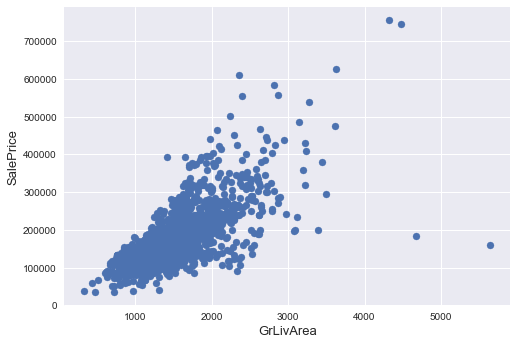

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We see in the lower right corner probably there lies two outliers and we will delete them.

In [4]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

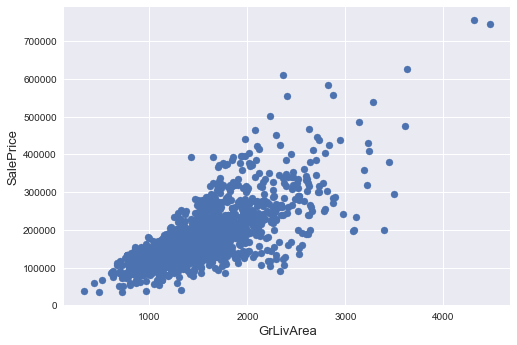

In [5]:
#Checking the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

There may exist other outliers in other feature variables but deleting them will affect the test result if the test data also have outliers. So we will keep them as they are.

#### Standardizing the target variable 'SalePrice'

We will plot the 'SalePrice' distribution and probability plot and see if there is any 